# Classification with Logistic Regression

## About the Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

You can read more about the data and the variables [here](https://www.kaggle.com/mlg-ulb/creditcardfraud).

In [1]:
### required packages
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading data
credit = pd.read_csv("creditcard.csv")
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Task1:
Split the data into train and test for the outcome/response and the predictor variables. Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution.

In [3]:
X = credit.drop('Class', axis='columns').values
y = credit.Class.values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.5, random_state = 0) 

### Task2: Answer the following in your own words.

- Does `LogisticRegression` use a penalty by default?  If yes, what penalty? 

**answer:** Regularization is applied by default. The deafulat penalty is L2.

    
- If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?
 
**answer:**  If it does the regulation by default the parameters are modified to provide the highest liklihood or smallest defined Loss. Applying the default penalty of L2 is equivalent to using Ridge regularization in which less influential independent variables will get very small coeficients and it decreases the variance of the model and avoids overfitting.
    
- If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**answer:** The defaul setting is (fit_intercept (bool), default=True : Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.) which means by default there is no need to include a column of 1s in the design matrix. 

### Task3: 

Create a instance of sklearn's `LogisticRegression` object for unpenalized logistic regression. Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.  I used `max_iter=10000` which seems to supress the warning.

Using this object, **run a logisitic regression analysis** of `Class` (y-variable) against `Amount` (x-variable) using your training data. 

Then **make a plot with three main components based on the analysis**:
1. Scatter-plot of `Amount` and `Outcome` on your test data
2. A curve showing the prediction (0 or 1, using `predict` - this curve will jump between 0 and 1) as a function of `Amount`
3. A curve showing the predicted probability of a positive outcome (using `predict_proba`) as a function of `Amount`. Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1) in an array.

Intercept: [-6.38060759]
Coefficient: [[0.00032136]]


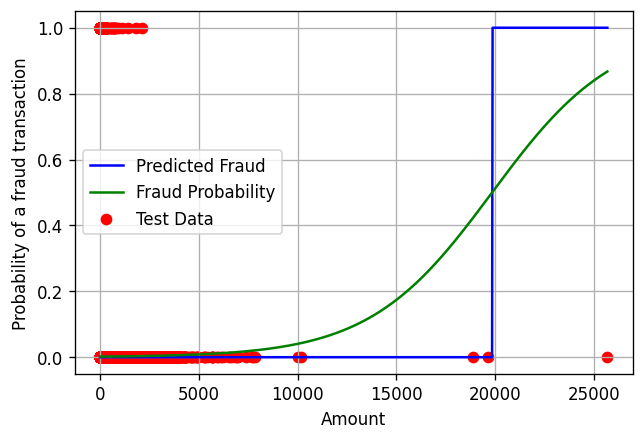

In [4]:
CREDITLR = LogisticRegression(penalty = 'none', max_iter = 10000)

### Separating the Amount values from Xtrain array as a 1D array
Amount_train = Xtrain[:,-1]

### We need to pass n*1 array, so reshape is needed 
creditlr = CREDITLR.fit(Amount_train.reshape(-1,1), ytrain)

print(f"Intercept: {creditlr.intercept_}\nCoefficient: {creditlr.coef_}")


fig, ax = plt.subplots(dpi = 120)

### 1- Scatter-plot of Amount and Outcome on your test data
plt.scatter(Xtest[:,-1], ytest, color = 'r',label='Test Data')

### 2- A curve showing the prediction (0 or 1, using predict -
### this curve will jump between 0 and 1) as a function of Amount

## I defined an Xrange array to give me more data points on the x
Xrange = np.linspace(0, max(Xtest[:,-1]), 1000)

Pred = creditlr.predict(Xrange.reshape(-1,1))
plt.plot(Xrange, Pred, color = 'b',label='Predicted Fraud')

## 3- A curve showing the predicted probability of a positive outcome 
##(using predict_proba) as a function of Amount.
## Note that predict_proba will return both p(Outcome=0) and
## p(Outcome=1) in an array.

PredProb = creditlr.predict_proba(Xrange.reshape(-1,1))

## PreProb returns T : array-like of shape (n_samples, n_classes)
## which means for both 0 and 1 class it produces probabilities

plt.plot(Xrange, PredProb[:,1], color = 'g',label='Fraud Probability')

plt.legend()
plt.xlabel('Amount')
plt.ylabel('Probability of a fraud transaction')
plt.grid()

### Task4.1:

Compute the label-based criteria for your amount-only classifier **using the test data**. Use a threshold of 0.5. 

In [5]:
# Calculate performance measures from scratch
# TP: true postives 
# TN: true negatives 
# FP: False positives 
# FN: False negatives
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

## Put code here to compute criteria:
## As the default threshold is 0.5 the following code doesnot
## change the result 
## ytest_prob = creditlr.predict_proba(Xtest[:,-1].reshape(-1,1))
## ytest_hat = (ytest_prob[:,1] > 0.5).astype(int)

ytest_hat = creditlr.predict(Xtest[:,-1].reshape(-1,1))
compute_performance(ytest_hat, ytest, creditlr.classes_)

## One of the results are labeled +
print('The amount which is labeled positive as a Fraud is: '
      , np.array(Xtest[ytest_hat == 1][0]).max())


tp: 0 tn: 142160 fp: 1 fn: 243
Accuracy: 0.998 Recall: 0.0 Precision: 0.0 Sensitivity: 0.0 Specificity: 1.0
The amount which is labeled positive as a Fraud is:  166198.0


### Task4.2: Answer the questions in this text box below.

- How many of the test instances are labeled positive by your classifier?

**answer:** tp+fp =1

- Choose one of the positively-labeled test instances, and explain why the classifier labeled it positive.

**answer:** The amount which is labeled positive as a Fraud is:  166198.0
It specified as fraud the highest amount of transaction in the test data

* Is this classifier useful for finding fraudulent transactions? 

**answer:** The acuracy of this classification is 99.8 which is the same as baseline, it seems that we don't learn more with this classification than just guesing not fraud for all the cases, whereas we know they are 492 fraud cases amonge 284315 transaction 

### Task5.1: 
Now fit a logistic regression model to the training data and include all the variables in the data frame (except for `Class`) in the cell below. You will want to make a new object like you did for the simpler model. 


In [6]:
creditlr_t = CREDITLR.fit(Xtrain, ytrain)
print(f"Intercept: {creditlr_t.intercept_}\nCoefficients:\n {creditlr.coef_}")


Intercept: [-5.07606388]
Coefficients:
 [[-4.49693669e-05  3.35220376e-01 -3.92002337e-01 -8.96189632e-01
   5.45596986e-01 -3.14478909e-02 -3.49947052e-02  5.96525749e-01
  -2.92255429e-01 -5.44427657e-01 -5.52855174e-01 -6.78558819e-01
   2.11370668e-01 -4.77388920e-01 -8.06474999e-01 -1.23577593e+00
  -4.57624590e-01 -2.69271226e-01  2.89914208e-01 -4.11626238e-02
   5.35133511e-01  8.32573124e-01  8.22852973e-01  1.01839793e-01
  -6.21744786e-02 -1.13441861e+00  3.28212249e-01 -2.64369198e-01
   1.46371882e-01 -5.40219998e-03]]


### Task5.2: Answer the question in this text box below.
* According to this more complex model, are larger or smaller Amounts more strongly associated with fraud, if all other variables are held equal?

**answer:** Previusly the Amount had the coefficient 0.00032136 in the equation and now its coeficient is -0.005402. As `Features with positive coefficients increase the probability of the modeled outcome as they increase, while features with negative coefficients decrease the probability as they increase.` in more complex model, unlike the first model, higher values of Amount are less associated with fraud.

### Task6.1:

In the cell below, Compute the label-based criteria for new classifier using the test data. Use a threshold of 0.5. 


In [7]:
ytrain_hat = creditlr_t.predict(Xtrain)

compute_performance(ytrain_hat, ytrain, creditlr_t.classes_)


tp: 158 tn: 142125 fp: 29 fn: 91
Accuracy: 0.999 Recall: 0.635 Precision: 0.845 Sensitivity: 0.635 Specificity: 1.0


### Task6.2 Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**answer:** tp+fp = 158+29=187

* Is this classifier **better or worse than the amount-only classifier** for finding fraudulent transactions? Explain in one or two sentences.*

**answer:** 
Increasing the number of tp and fp infers that the smaller amounts are associated to fraud. Increasing precision from 0 to 0.845 shows not only number of positive labels increased, but this labeling improved the prediction results.

### Task7.1: 

Plot ROC curves for both of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

/Users/razbeh/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The area beneath the ROC curve is:  0.46176345434073895


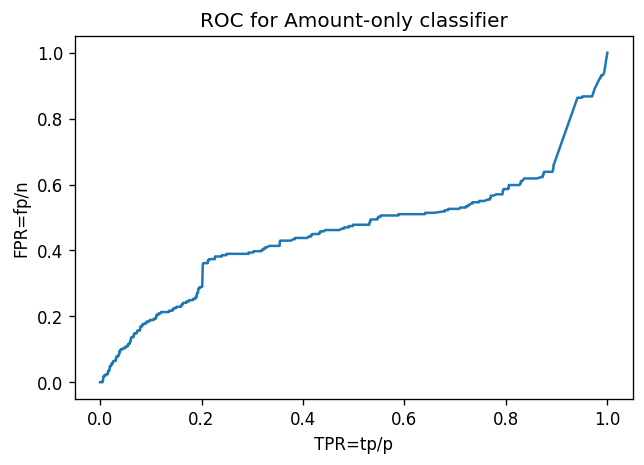

In [8]:
# ROC for Amount-only classifier
creditlr = CREDITLR.fit(Xtrain[:,-1].reshape(-1,1), ytrain)

ytrain_prob = creditlr.predict_proba(Xtrain[:,-1].reshape(-1,1))


fpr, tpr , _ = roc_curve(ytrain, ytrain_prob[:,1], pos_label = 1)

fig, ax = plt.subplots(dpi = 120)

ax = sns.lineplot(fpr, tpr)
plt.xlabel('TPR=tp/p')
plt.ylabel('FPR=fp/n')
plt.title('ROC for Amount-only classifier')
print('The area beneath the ROC curve is: ',auc(fpr, tpr))

/Users/razbeh/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The area beneath the ROC curve is: 0.9693274836899831


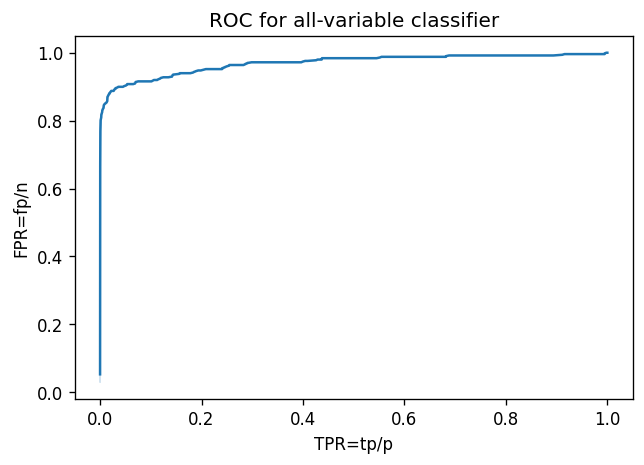

In [9]:
creditlr_t = CREDITLR.fit(Xtrain, ytrain)

# ROC for all-variable classifier
ytrain_prob_t = creditlr_t.predict_proba(Xtrain)

fpr_t, tpr_t , _ = roc_curve(ytrain, ytrain_prob_t[:,1], pos_label = 1)

fig, ax = plt.subplots(dpi = 120)

ax = sns.lineplot(fpr_t, tpr_t)
plt.xlabel('TPR=tp/p')
plt.ylabel('FPR=fp/n')
plt.title('ROC for all-variable classifier')

print('The area beneath the ROC curve is:',auc(fpr_t, tpr_t))

### Task7.2: Answer the questions in this text box below.
* Which classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

**answer:** all-variable classifier has a higher estimate probability bacause has higher AUROC 

* How could you explain a result where a logistic regression classifier produces an AUROC that is "worse than random", i.e. less than 0.5, even on its training set?

**answer:** If we plot line with 45 degrees slope, at some points the Amount-only classifier falls beneath the line. and its area is less than 0.5

### Task8: 

Plot precision-recall curves for both of your classifiers using the cell below. Be sure to label your axes.

* Which classifier is preferable if we want to recover at least 60% of fraudulent transactions?

**answer:** all-variable classifier has higher recall (0.75) compare to Amount-only classifier with recall (0.02), thus the all-variable classifier is preferred. 


/Users/razbeh/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Recall=tp/classP')

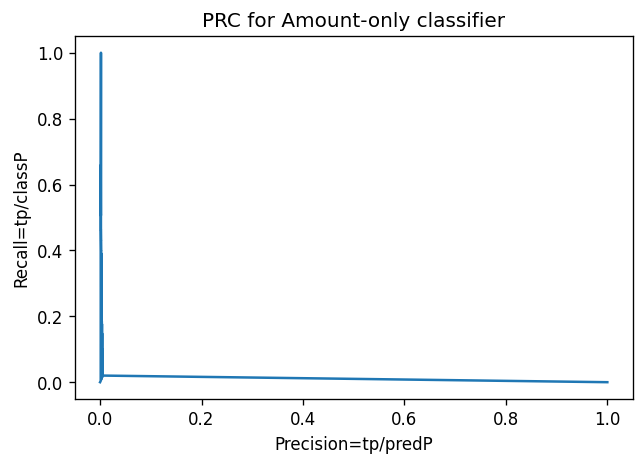

In [10]:
# PRC for Amount-only classifier

precision, recall , threshold = precision_recall_curve(ytrain, ytrain_prob[:,1],\
                                                       pos_label = 1)

fig, ax = plt.subplots(dpi = 120)

ax = sns.lineplot(precision, recall)
plt.title('PRC for Amount-only classifier')
plt.xlabel('Precision=tp/predP')
plt.ylabel('Recall=tp/classP')

/Users/razbeh/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Recall=tp/classP')

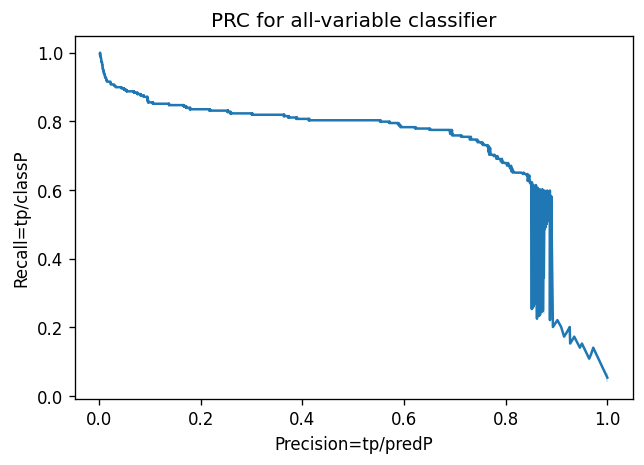

In [11]:
# PRC for all-variable classifier

precision_t, recall_t , threshold_t = precision_recall_curve(ytrain, ytrain_prob_t[:,1],\
                                                       pos_label = 1)

fig, ax = plt.subplots(dpi = 120)

ax = sns.lineplot(precision_t, recall_t)

plt.title('PRC for all-variable classifier')
plt.xlabel('Precision=tp/predP')
plt.ylabel('Recall=tp/classP')